**Enhanced Phishing Transactions Detection on Ethereum Network with Tree-based Ensembles: An Empirical Study**

* **Researchers:**
  * **Shikah Alsunaidi** (Information and Computer Science Department, KFUPM)
  * **Dr. Hamoud Aljamaan** (Information and Computer Science Department, KFUPM)
---

## ▶ **1. Imports**

---



In [ ]:
# import libraries section
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

In [ ]:
# Stop warnings
import warnings as w
w.simplefilter(action='ignore',category=FutureWarning)

# ▶ **2. Global Functions**

---

## **2.1. Upload File Function**

---


In [ ]:
# This function takes the file name to upload it and return the dataframe
def upload_file(file_name):

  # Upload CSV file (ReducedDS.csv)
  from google.colab import files
  uploaded = files.upload()

  # Convert the uploaded data into dataframe
  import io
  df = pd.read_csv(io.BytesIO(uploaded[file_name]))

  return df

## **2.2. Write to File Function**

---


In [ ]:
# This function write the dataframe to excel file
def write_to_excel (mcc_DF, model, fileName):
  if model == "RF":
    df=pd.DataFrame(mcc_DF,columns=[model])
    df.to_csv(fileName,index = False)
  else:
    df = pd.read_csv(fileName)
    df[model]=mcc_DF
    df.to_csv(fileName,index = False)

# ▶ **3. Load & Explore & Preproccessing the Original Dataset**


---



## ❄ **Al-EMari2021 Dataset**
  * S. Al-E’mari, M. Anbar, Y. Sanjalawe, and S. Manickam, A Labeled Transactions-Based Dataset on the Ethereum Network, vol. 1347, no. February. Springer Singapore, 2021.
  * Multi-lebel
  * https://github.com/salam-ammari/Labeled-Transactions-based-Dataset-of-Ethereum-Network


---



## **3.1 Load DS**

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AlEMari2021_DS.csv to AlEMari2021_DS.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AlEMari2021_DS.csv']))

In [ ]:
df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
0,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,0x,129358,21000,2017-10-16 05:26:53 UTC,4370008,0x5e14d30d2155c0cdd65044d7e0f296373f3e92f65ebd...,0,0,NaN,NaN
1,0xfa5f1d7715562adb1e408fdbbbbfc033ae4fadca1e07...,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,0x,5415387,21000,2017-10-16 05:28:49 UTC,4370014,0x900efe010b41b8b6b135db041422fac80b69b96d93c2...,0,0,NaN,NaN
2,0x37928f1d12ee769d0876695aaa815c13d705f8b1e376...,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,0x,1369625,21000,2017-10-16 05:29:19 UTC,4370015,0xfe7d1bc1c6257f92bacb0f8b1266c9894dda99b42e78...,0,0,NaN,NaN
3,0xaad886f331a2fb40495cdf5faa10882852fcd324f064...,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,0x,2464655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN
4,0x3dbe36fd1a1b01b5e1b343ff78ec1ec189feee5acf46...,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,0x,2569655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN


## **3.2 Data Exploration & Preproccessing**

---

### **3.2.1. Dataset description**

---



In [ ]:
# Dimensions of the dataset
print('The dimension of the dataset is: ', df.shape)

The dimension of the dataset is:  (71250, 18)


In [ ]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71250 entries, 0 to 71249
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hash                         71250 non-null  object 
 1   nonce                        71250 non-null  int64  
 2   transaction_index            71250 non-null  int64  
 3   from_address                 71250 non-null  object 
 4   to_address                   71250 non-null  object 
 5   value                        71250 non-null  float64
 6   gas                          71250 non-null  int64  
 7   gas_price                    71250 non-null  float64
 8   input                        71250 non-null  object 
 9   receipt_cumulative_gas_used  71250 non-null  int64  
 10  receipt_gas_used             71250 non-null  int64  
 11  block_timestamp              71250 non-null  object 
 12  block_number                 71250 non-null  int64  
 13  block_hash      

In [ ]:
# Dataframe descriptive statistics
df.describe(include='all')

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
count,71250,7.125000e+04,71250.000000,71250,71250,7.125000e+04,7.125000e+04,7.125000e+04,71250,7.125000e+04,7.125000e+04,71250,7.125000e+04,71250,71250.000000,71250.000000,2628,11649
unique,71239,NaN,NaN,34069,40619,NaN,NaN,NaN,1550,NaN,NaN,41027,NaN,40847,NaN,NaN,3,2
top,0x8d7f9491e3c7cf44200ef8e6385789c7a204971ff7d0...,NaN,NaN,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xb547027a4ccd46ec98199fa88aaedf5aa981db26,NaN,NaN,NaN,0x,NaN,NaN,2019-10-06 01:23:28 UTC,NaN,0x7bcffbbcda6a134b18cc688cc6c9ef5f9ff08845bcbf...,NaN,NaN,Scamming,Scamming
freq,2,NaN,NaN,1701,3109,NaN,NaN,NaN,61510,NaN,NaN,55,NaN,55,NaN,NaN,1402,9758
mean,NaN,3.078713e+05,72.694035,NaN,NaN,1.002473e+19,6.834562e+04,3.449287e+10,NaN,2.946858e+06,2.627084e+04,NaN,5.209526e+06,NaN,0.036884,0.163495,NaN,NaN
std,NaN,9.978455e+05,64.650247,NaN,NaN,2.858156e+20,1.335602e+05,1.250177e+11,NaN,2.444175e+06,5.131794e+04,NaN,7.509279e+05,NaN,0.188479,0.369819,NaN,NaN
min,NaN,0.000000e+00,0.000000,NaN,NaN,0.000000e+00,2.100000e+04,1.000000e+00,NaN,2.100000e+04,2.100000e+04,NaN,4.370008e+06,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,3.000000e+00,21.000000,NaN,NaN,2.490000e+16,2.100000e+04,8.000000e+09,NaN,7.744545e+05,2.100000e+04,NaN,4.900821e+06,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,8.500000e+01,56.000000,NaN,NaN,2.480000e+17,3.500000e+04,2.000000e+10,NaN,2.338859e+06,2.100000e+04,NaN,5.067095e+06,NaN,0.000000,0.000000,NaN,NaN
75%,NaN,7.515425e+04,109.000000,NaN,NaN,1.500000e+18,9.000000e+04,5.060947e+10,NaN,4.820330e+06,2.100000e+04,NaN,5.285231e+06,NaN,0.000000,0.000000,NaN,NaN


### **3.2.2. Duplication check**


---



In [ ]:
# Show all duplicate rows
duplicate = df[df.duplicated(keep = False)]
duplicate

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
12344,0xa4875aba267cec53fcfcc28fea31342e58adb8151687...,6,9,0x29e225d888cf11c5e67613bffd30bcf071eb3d4a,0x2da8703d18afed53b303119e4ff06cf035a9fadb,1.000000e+18,21000,6.100000e+10,0x,330593,21000,2017-12-20 21:57:09+00:00,4767697,0x0b13810af161d2147c07458864323dc398b0c0084812...,1,1,Phishing,Phishing
12345,0xa4875aba267cec53fcfcc28fea31342e58adb8151687...,6,9,0x29e225d888cf11c5e67613bffd30bcf071eb3d4a,0x2da8703d18afed53b303119e4ff06cf035a9fadb,1.000000e+18,21000,6.100000e+10,0x,330593,21000,2017-12-20 21:57:09+00:00,4767697,0x0b13810af161d2147c07458864323dc398b0c0084812...,1,1,Phishing,Phishing
12346,0xbd3f8d356cf9305690383e8e3ad7023d161fc01dcee9...,7,24,0x29e225d888cf11c5e67613bffd30bcf071eb3d4a,0x2da8703d18afed53b303119e4ff06cf035a9fadb,1.020000e+20,21000,6.100000e+10,0x,601384,21000,2017-12-20 22:01:51+00:00,4767720,0x22631f363253fd2374085dd1377f55487559468d3382...,1,1,Phishing,Phishing
12347,0xbd3f8d356cf9305690383e8e3ad7023d161fc01dcee9...,7,24,0x29e225d888cf11c5e67613bffd30bcf071eb3d4a,0x2da8703d18afed53b303119e4ff06cf035a9fadb,1.020000e+20,21000,6.100000e+10,0x,601384,21000,2017-12-20 22:01:51+00:00,4767720,0x22631f363253fd2374085dd1377f55487559468d3382...,1,1,Phishing,Phishing
12379,0xa71fd3b997ac0fcb045e1f887f22d87ce32ec51f6d86...,14,28,0x29e225d888cf11c5e67613bffd30bcf071eb3d4a,0x2da8703d18afed53b303119e4ff06cf035a9fadb,1.700000e+19,21000,5.100000e+10,0x,945428,21000,2017-12-22 21:41:29+00:00,4778875,0x3af5d02ba7bf38cfc929efc76da706183b933ac0549f...,1,1,Phishing,Phishing
12380,0xa71fd3b997ac0fcb045e1f887f22d87ce32ec51f6d86...,14,28,0x29e225d888cf11c5e67613bffd30bcf071eb3d4a,0x2da8703d18afed53b303119e4ff06cf035a9fadb,1.700000e+19,21000,5.100000e+10,0x,945428,21000,2017-12-22 21:41:29+00:00,4778875,0x3af5d02ba7bf38cfc929efc76da706183b933ac0549f...,1,1,Phishing,Phishing
59721,0xe3492b6b1860463fc59d96b7efc7a67a3fe5ddd017a3...,0,31,0x14d3cb89bfb1513cfae386d9d6ff447753fd04a5,0xedc0c49946b93aa296a11298480ae7913bb65222,2.380000e+18,21000,4.100000e+10,0x,871159,21000,2018-04-03 12:43:11+00:00,5373107,0xe2a9a6b2d3c679d2add3ae3d170f7d5bde37dfd996f4...,1,1,Scamming,Scamming
59722,0xe3492b6b1860463fc59d96b7efc7a67a3fe5ddd017a3...,0,31,0x14d3cb89bfb1513cfae386d9d6ff447753fd04a5,0xedc0c49946b93aa296a11298480ae7913bb65222,2.380000e+18,21000,4.100000e+10,0x,871159,21000,2018-04-03 12:43:11+00:00,5373107,0xe2a9a6b2d3c679d2add3ae3d170f7d5bde37dfd996f4...,1,1,Scamming,Scamming
59918,0x0f82367cc35f3f4b53d53eabc601e3a943a8a172280c...,0,38,0x787e8f0e406cb71a22fd2023316f231d0311b14f,0xedc0c49946b93aa296a11298480ae7913bb65222,5.090000e+17,21000,4.100000e+10,0x,1680064,21000,2018-04-12 19:29:35+00:00,5428973,0x1d216244a5791fcfb37bee0d07be01bb7d71e66632c5...,1,1,Scamming,Scamming
59919,0x0f82367cc35f3f4b53d53eabc601e3a943a8a172280c...,0,38,0x787e8f0e406cb71a22fd2023316f231d0311b14f,0xedc0c49946b93aa296a11298480ae7913bb65222,5.090000e+17,21000,4.100000e+10,0x,1680064,21000,2018-04-12 19:29:35+00:00,5428973,0x1d216244a5791fcfb37bee0d07be01bb7d71e66632c5...,1,1,Scamming,Scamming


#### **A. Drop duplicate rows**


---



In [ ]:
if df.duplicated().any():
  df=df.drop_duplicates()
  print('Duplicates dropped')

Duplicates dropped


#### **B. New dimension**

---



In [ ]:
# Dimensions of the dataset
print('The dimension of the dataset is: ', df.shape)

The dimension of the dataset is:  (71239, 18)


### **3.2.3. Missing data check**

---



In [ ]:
df.isnull().sum()

hash                               0
nonce                              0
transaction_index                  0
from_address                       0
to_address                         0
value                              0
gas                                0
gas_price                          0
input                              0
receipt_cumulative_gas_used        0
receipt_gas_used                   0
block_timestamp                    0
block_number                       0
block_hash                         0
from_scam                          0
to_scam                            0
from_category                  68622
to_category                    59601
dtype: int64

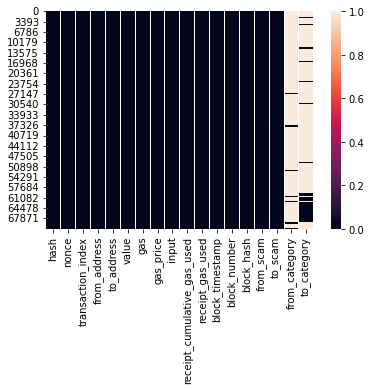

In [ ]:
sns.heatmap(df.isnull());

### **3.2.4. Degree of class balance**

---



In [ ]:
# Data balance (Textual description)
df['from_scam'].value_counts()

0    68622
1     2617
Name: from_scam, dtype: int64

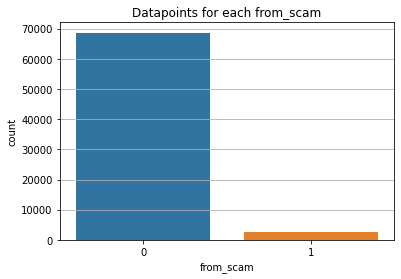

In [ ]:
# Data balance (Graphical description)
plt.title('Datapoints for each from_scam')
plt.grid('on')
sns.countplot(df['from_scam']);

In [ ]:
# Data balance (Textual description)
df['to_scam'].value_counts()

0    59601
1    11638
Name: to_scam, dtype: int64

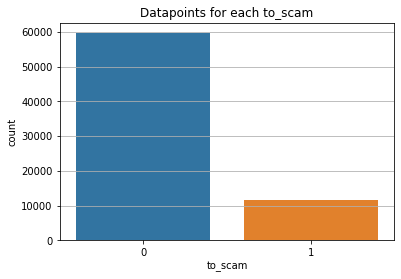

In [ ]:
# Data balance (Graphical description)
plt.title('Datapoints for each to_scam')
plt.grid('on')
sns.countplot(df['to_scam']);

In [ ]:
# Data balance (Textual description)
df['from_category'].value_counts()

Scamming    1394
Phishing    1222
Fake ICO       1
Name: from_category, dtype: int64

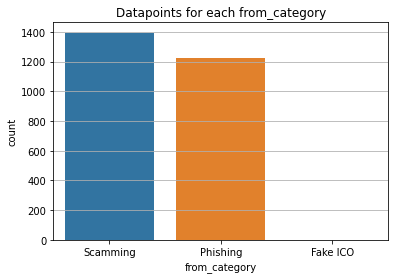

In [ ]:
# Data balance (Graphical description)
plt.title('Datapoints for each from_category')
plt.grid('on')
sns.countplot(df['from_category']);

In [ ]:
# Data balance (Textual description)
df['to_category'].value_counts()

Scamming    9752
Phishing    1886
Name: to_category, dtype: int64

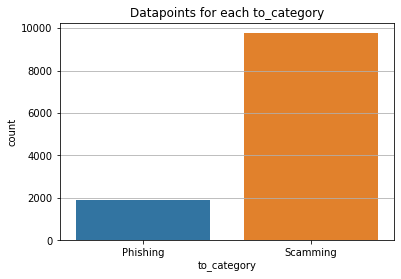

In [ ]:
# Data balance (Graphical description)
plt.title('Datapoints for each to_category')
plt.grid('on')
sns.countplot(df['to_category']);

## **3.3 Save the cleaned dataset**

---


In [ ]:
df.to_csv('Al-EMari2021_cleaned_DS.csv', index = False)

# ▶ **4. Convert the problem into a binary-class problem**


---



### **4.1. Load the cleaned dataset**

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Al-EMari2021_cleaned_DS.csv to Al-EMari2021_cleaned_DS (1).csv


In [ ]:
import io
df_cleaned = pd.read_csv(io.BytesIO(uploaded['Al-EMari2021_cleaned_DS.csv']))

In [ ]:
df_cleaned.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
0,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,0x,129358,21000,2017-10-16 05:26:53 UTC,4370008,0x5e14d30d2155c0cdd65044d7e0f296373f3e92f65ebd...,0,0,NaN,NaN
1,0xfa5f1d7715562adb1e408fdbbbbfc033ae4fadca1e07...,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,0x,5415387,21000,2017-10-16 05:28:49 UTC,4370014,0x900efe010b41b8b6b135db041422fac80b69b96d93c2...,0,0,NaN,NaN
2,0x37928f1d12ee769d0876695aaa815c13d705f8b1e376...,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,0x,1369625,21000,2017-10-16 05:29:19 UTC,4370015,0xfe7d1bc1c6257f92bacb0f8b1266c9894dda99b42e78...,0,0,NaN,NaN
3,0xaad886f331a2fb40495cdf5faa10882852fcd324f064...,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,0x,2464655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN
4,0x3dbe36fd1a1b01b5e1b343ff78ec1ec189feee5acf46...,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,0x,2569655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN


## **4.2. Copy the cleaned dataset**

---



In [ ]:
# Take a copy of the cleaned dataset
bin_data=df_cleaned

In [ ]:
# Check the number of rows for each class
bin_data['from_scam'].value_counts()

0    68622
1     2617
Name: from_scam, dtype: int64

In [ ]:
# Check the number of rows for each class
bin_data['to_scam'].value_counts()

0    59601
1    11638
Name: to_scam, dtype: int64

In [ ]:
# Check the number of rows for each from_category
bin_data['from_category'].value_counts()

Scamming    1394
Phishing    1222
Fake ICO       1
Name: from_category, dtype: int64

In [ ]:
# Check the number of rows for each to_category
bin_data['to_category'].value_counts()

Scamming    9752
Phishing    1886
Name: to_category, dtype: int64

## **4.3. Convert into a binary-class problem**
  * Add new feature (a binary class label) called **"class"**, which has two values 0 & 1 as follows.
    * **Class 0:** None Malicious class (Not Attack)
      * **if** to_scam==from_scam == 0
    * **Class 1:** Malicious class (Attack)
      * **if** to_scam **or** from_scam **or** both == 1


---



In [ ]:
#  Add Empty Column (class) to Dataframe (bin_data)
bin_data['class'] = np.nan

In [ ]:
# Check that the new column (class) has been added to (bin_data)
bin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71239 entries, 0 to 71238
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hash                         71239 non-null  object 
 1   nonce                        71239 non-null  int64  
 2   transaction_index            71239 non-null  int64  
 3   from_address                 71239 non-null  object 
 4   to_address                   71239 non-null  object 
 5   value                        71239 non-null  float64
 6   gas                          71239 non-null  int64  
 7   gas_price                    71239 non-null  float64
 8   input                        71239 non-null  object 
 9   receipt_cumulative_gas_used  71239 non-null  int64  
 10  receipt_gas_used             71239 non-null  int64  
 11  block_timestamp              71239 non-null  object 
 12  block_number                 71239 non-null  int64  
 13  block_hash      

In [ ]:
# Change the lable of class 2 to be 0
bin_data['class'] = np.where((bin_data['to_scam'] == 1) | (bin_data['from_scam'] == 1), 1, 0)

## **4.4. Remove useless features**
  * from_scam, to_scam, from_category, and to_category features may reveal some information to the ML model.

---



In [ ]:
bin_data=bin_data.drop(['from_scam', 'to_scam', 'from_category', 'to_category'], axis=1)

## **4.5. Dataset size & classes distribution**

---



In [ ]:
# Number of instances in bin_dataset
bin_data.shape

(71239, 15)

In [ ]:
# Check the number of rows for each class
counts = bin_data['class'].value_counts()
counts

0    57000
1    14239
Name: class, dtype: int64

In [ ]:
#Class ratio in the bin_data
print("Class 0 = %",round(counts[0]*100/counts.sum(),2))
print("Class 1 = %",round(counts[1]*100/counts.sum(),2))

Class 0 = % 80.01
Class 1 = % 19.99


## **4.6. Save the cleaned imbalanced binary class dataset**

---


In [ ]:
bin_data.to_csv('Final_Cleaned_dataset.csv', index = False)

# **▶ 5. Data Preprocessing (Phase #2)**

  ---

## **5.1 Upload the cleaned imbalanced dataset**

---



In [ ]:
# Upload CSV file (Final_Cleaned_dataset.csv)
from google.colab import files
uploaded = files.upload()

Saving Final_Cleaned_dataset.csv to Final_Cleaned_dataset.csv


In [ ]:
# Convert the uploaded data into dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['Final_Cleaned_dataset.csv']))

In [ ]:
df

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,class
0,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,0x,129358,21000,2017-10-16 05:26:53 UTC,4370008,0x5e14d30d2155c0cdd65044d7e0f296373f3e92f65ebd...,0
1,0xfa5f1d7715562adb1e408fdbbbbfc033ae4fadca1e07...,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,0x,5415387,21000,2017-10-16 05:28:49 UTC,4370014,0x900efe010b41b8b6b135db041422fac80b69b96d93c2...,0
2,0x37928f1d12ee769d0876695aaa815c13d705f8b1e376...,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,0x,1369625,21000,2017-10-16 05:29:19 UTC,4370015,0xfe7d1bc1c6257f92bacb0f8b1266c9894dda99b42e78...,0
3,0xaad886f331a2fb40495cdf5faa10882852fcd324f064...,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,0x,2464655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0
4,0x3dbe36fd1a1b01b5e1b343ff78ec1ec189feee5acf46...,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,0x,2569655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71234,0x3ea1ea78fe7107fa15f667266c66dc63786b6470dbd1...,69,204,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,6.530000e+17,21000,3.000000e+09,0x,9039053,21000,2019-12-26 10:28:03+00:00,9165303,0xe2abfd231cc7e8cc633c88f06cd8a97e7fc76dda6cdc...,1
71235,0x29931318eac76fb7ec086cbfaee3d95994c554a466f4...,28,101,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,1.090000e+18,21000,5.000000e+09,0x,5082356,21000,2019-12-30 05:40:39+00:00,9184428,0x54a4dff1e2d00422a913c5f2f58f57bde261492dce2c...,1
71236,0x71741c64fff59755c32e14e0fa53bc4a4ad51ff3545a...,70,201,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,1.090000e+18,21000,1.500000e+09,0x,9673734,21000,2019-12-30 05:46:10+00:00,9184447,0x88502f5b8572d804427453f3c75305a570bc81d19707...,1
71237,0x28fb91f62b1948d044db2db46411ea0042473d158353...,29,36,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,4.800000e+16,21000,6.000000e+09,0x,2823118,21000,2019-12-30 12:58:56+00:00,9185936,0x4897e62e832420b6d5fc03bbed9e2312115e9c260dee...,1


In [ ]:
# input feature contains null value (0x) which means empty
# This code convert their hex value into integer

for index, row in df.iterrows():
    if df.loc[index,'input'] == '0x':
      df.loc[index,'input'] = None
    else:
       df.loc[index,'input']=int(df.loc[index,'input'], base=16)

In [ ]:
# Convert string block_timestamp into integer
from datetime import datetime

for index, row in df.iterrows():
  if 'UTC' in df.loc[index,'block_timestamp'] :
    df.loc[index,'block_timestamp'] =int(round(datetime.strptime(df.loc[index,'block_timestamp'], '%Y-%m-%d %H:%M:%S %Z').timestamp()))
  else:
    df.loc[index,'block_timestamp']=int(round(datetime.strptime(df.loc[index,'block_timestamp'], '%Y-%m-%d %H:%M:%S%z').timestamp()))

In [ ]:
# convert hex columnt into integer
df['from_address']=df['from_address'].apply(int, base=16)
df['to_address']=df['to_address'].apply(int, base=16)
df['block_hash']=df['block_hash'].apply(int, base=16)


'''df['from_address']=float.fromhex(df['from_address'])
df['to_address']=float.fromhex(df['to_address'])
df['block_hash']=float.fromhex(df['block_hash'])'''

"df['from_address']=float.fromhex(df['from_address'])\ndf['to_address']=float.fromhex(df['to_address'])\ndf['block_hash']=float.fromhex(df['block_hash'])"

In [ ]:
# Dataframe descriptive statistics
df.describe(include='all')

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,class
count,71239,7.123900e+04,71239.000000,71239,71239,7.123900e+04,7.123900e+04,7.123900e+04,9.740000e+03,7.123900e+04,7.123900e+04,7.123900e+04,7.123900e+04,71239,71239.000000
unique,71239,NaN,NaN,34069,40619,NaN,NaN,NaN,1.548000e+03,NaN,NaN,4.084700e+04,NaN,40847,NaN
top,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,NaN,NaN,219704307174701825550306207531880014204969680320,1034910898269318443053478467249796827897831480102,NaN,NaN,NaN,1.020254e+09,NaN,NaN,1.570325e+09,NaN,5600195514795562563970154826484984595919627982...,NaN
freq,1,NaN,NaN,1701,3109,NaN,NaN,NaN,4.390000e+03,NaN,NaN,5.500000e+01,NaN,55,NaN
mean,NaN,3.079188e+05,72.699055,NaN,NaN,1.002444e+19,6.835182e+04,3.449221e+10,NaN,2.947068e+06,2.627165e+04,NaN,5.209500e+06,NaN,0.199876
std,NaN,9.979153e+05,64.652229,NaN,NaN,2.858375e+20,1.335693e+05,1.250272e+11,NaN,2.444187e+06,5.132186e+04,NaN,7.509658e+05,NaN,0.399910
min,NaN,0.000000e+00,0.000000,NaN,NaN,0.000000e+00,2.100000e+04,1.000000e+00,NaN,2.100000e+04,2.100000e+04,NaN,4.370008e+06,NaN,0.000000
25%,NaN,3.000000e+00,21.000000,NaN,NaN,2.490000e+16,2.100000e+04,8.000000e+09,NaN,7.744930e+05,2.100000e+04,NaN,4.900822e+06,NaN,0.000000
50%,NaN,8.500000e+01,56.000000,NaN,NaN,2.480000e+17,3.500000e+04,2.000000e+10,NaN,2.339356e+06,2.100000e+04,NaN,5.066836e+06,NaN,0.000000
75%,NaN,7.519500e+04,109.000000,NaN,NaN,1.500000e+18,9.000000e+04,5.060947e+10,NaN,4.821236e+06,2.100000e+04,NaN,5.285103e+06,NaN,0.000000


In [ ]:
# remove unique features from the DS
df=df.drop(['hash'], axis=1)
df.shape

(71239, 14)

In [ ]:
# Dataframe descriptive statistics
df.isnull().sum()

nonce                              0
transaction_index                  0
from_address                       0
to_address                         0
value                              0
gas                                0
gas_price                          0
input                          61499
receipt_cumulative_gas_used        0
receipt_gas_used                   0
block_timestamp                    0
block_number                       0
block_hash                         0
class                              0
dtype: int64

In [ ]:
# Remove features with high ratio of missing data from the DS
# Remove input feature
df=df.drop(['input'], axis=1)
df.shape

(71239, 13)

In [ ]:
# Display the final preprocessed dataset
df

,nonce,transaction_index,from_address,to_address,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,class
0,370394,4,219704307174701825550306207531880014204969680320,1227604104459203165831046403453807181256087419393,1.800000e+18,30000,2.205000e+10,129358,21000,1508131613,4370008,4255420133059167009667237230883684614702178747...,0
1,229082,85,275743267630995430824748182219302055425468805264,1055960445249476607035001961529478182329226168619,7.500000e+15,90000,2.060947e+10,5415387,21000,1508131729,4370014,6515953912661476025751393730830217503072142416...,0
2,229095,31,275743267630995430824748182219302055425468805264,541028831339074892216198155203822425149572260523,7.500000e+15,90000,2.060947e+10,1369625,21000,1508131759,4370015,1151085109945352904630161644475523701708413639...,0
3,229126,78,275743267630995430824748182219302055425468805264,1273142765540556399656642466493896797925385652905,7.500000e+15,90000,2.060947e+10,2464655,21000,1508131783,4370016,1315096441148896408417461685248432672294929132...,0
4,229131,83,275743267630995430824748182219302055425468805264,972214104056531287615892491532711353818983342665,7.500000e+15,90000,2.060947e+10,2569655,21000,1508131783,4370016,1315096441148896408417461685248432672294929132...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71234,69,204,711126317058125164017483952017839971849144156097,456298314710322749915140952499362198934523528577,6.530000e+17,21000,3.000000e+09,9039053,21000,1577356083,9165303,1025265817163501609666752422449863489369541890...,1
71235,28,101,1396393604881650477749803717026188886627473974063,711126317058125164017483952017839971849144156097,1.090000e+18,21000,5.000000e+09,5082356,21000,1577684439,9184428,3828558781028666353183370350092727415261765229...,1
71236,70,201,711126317058125164017483952017839971849144156097,456298314710322749915140952499362198934523528577,1.090000e+18,21000,1.500000e+09,9673734,21000,1577684770,9184447,6165622202199372422950216471471482371427211216...,1
71237,29,36,1396393604881650477749803717026188886627473974063,711126317058125164017483952017839971849144156097,4.800000e+16,21000,6.000000e+09,2823118,21000,1577710736,9185936,3283490766040479683454065544983825322380515438...,1


In [ ]:
# Save the preprocessed dataset
df.to_csv('preprocessed dataset.csv', index = False)